In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from itertools import groupby
from pylab import cm,matplotlib
from matplotlib.colors import ListedColormap

In [4]:
path_to_file = 'Salts_Lollipop.xlsx'
df=pd.read_excel(path_to_file,sheet_name='Lollipop',header=0,engine='openpyxl')
df.sort_values(by='Case')

N_salts=len(df['Salt'].value_counts())

In [5]:
# Definition of required parameters and tools

my_range = list(range(len(df.index)))

# Font size
fs_t = 10
fs_x = 14

axes, xlim1, xlim2, var1, var2 = ([0,1,2,3,4],[50.0,0.0,0.0,0.0,0.0],
                                         [200,60,180,80,2.5],
                                   ['LCOE','CF','Par','F_pipe','F_tank'],
                                   ['LCOE($\$/MWh$)','Cap. Factor ($\%$)',r'$E_{par}$ $(GWh)$',r'$E_{par,pipe}$ $(GWh)$',r'$E_{par,tank}$ $(GWh)$'])

In [6]:
# For colors

viridisBig = cm.get_cmap('viridis', 512)
cmap = ListedColormap(viridisBig(np.linspace(0.0, 0.9, N_salts)))
c_v=[]
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    c_v.append(matplotlib.colors.rgb2hex(rgba))
    

In [7]:
c = []
for j in my_range:
    if df['Salt'][j] == 'HTF2':
        c.append(c_v[6])
    elif df['Salt'][j] == 'HTF3':
        c.append(c_v[5])
    elif df['Salt'][j] == 'HTF4':
        c.append(c_v[4])
    elif df['Salt'][j] == 'HTF5':
        c.append(c_v[3])
    elif df['Salt'][j] == 'HTF6':
        c.append(c_v[2])
    elif df['Salt'][j] == 'HTF7':
        c.append(c_v[1])
    elif df['Salt'][j] == 'HTF8':
        c.append(c_v[0]) 

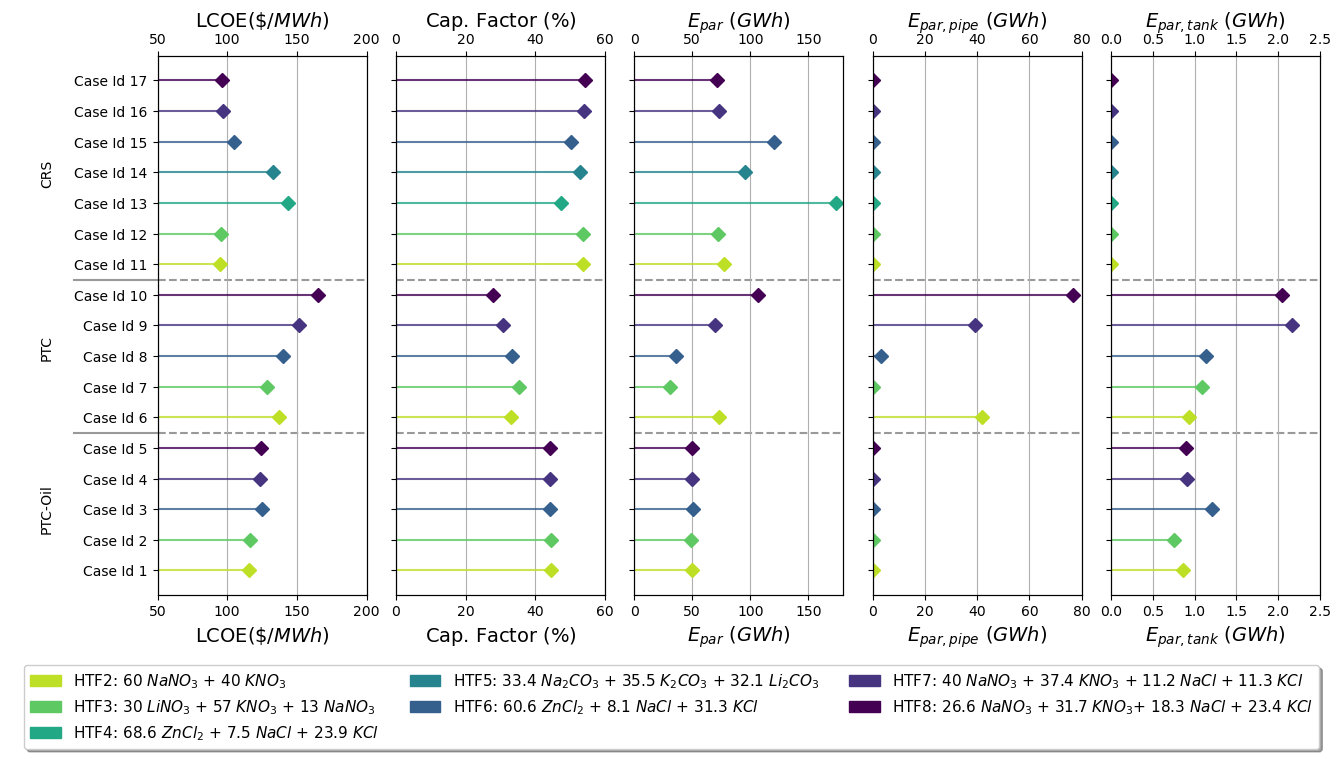

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,7))
plt.subplots_adjust(wspace=0.14)

for i in axes:
    plt.axes(ax[i])
    ax[i].set_xlim(xlim1[i],xlim2[i])
    
    for j in my_range:
        # These two lines are for lollipop
        plt.hlines(y=my_range[j], xmin=0, xmax=df[var1[i]][j], color=c[j], alpha=0.8)
        plt.plot(df[var1[i]][j], my_range[j], "D", ms=N_salts ,color=c[j])
                    
    plt.xlabel(var2[i], fontsize=fs_x)
    plt.grid(axis='x')
    plt.xticks(fontsize=fs_t)
    ax0 = ax[i].twiny()
    ax0.set_xlim(ax[i].get_xlim())
    plt.xlabel(var2[i], fontsize=fs_x)
    plt.xticks(fontsize=fs_t)

h = 4.5
delta = 5
ax[0].axhline(xmin=-0.4,xmax=0,y=h,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
ax[0].axhline(xmin=-0.4,xmax=0,y=h+delta,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
for i in axes:
    ax[i].axhline(xmin=0,xmax=1,y=h,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)
    ax[i].axhline(xmin=0,xmax=1,y=h+delta,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)

ax[0].annotate('CRS',
            xy=(40, 600),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax[0].annotate('PTC',
            xy=(40, 425),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax[0].annotate('PTC-Oil',
            xy=(40, 275),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)

plt.yticks(my_range, df['Case'])

#plt.yticks(my_range, '')

# Molten salt legends
S1_p = mpatches.Patch(color=c_v[6],label='HTF2: 60 $NaNO_3$ + 40 $KNO_3$')
S2_p = mpatches.Patch(color=c_v[5],label='HTF3: 30 $LiNO_3$ + 57 $KNO_3$ + 13 $NaNO_3$')
S3_p = mpatches.Patch(color=c_v[4],label='HTF4: 68.6 $ZnCl_2$ + 7.5 $NaCl$ + 23.9 $KCl$')
S4_p = mpatches.Patch(color=c_v[3],label='HTF5: 33.4 $Na_2CO_3$ + 35.5 $K_2CO_3$ + 32.1 $Li_2CO_3$')
S5_p = mpatches.Patch(color=c_v[2],label='HTF6: 60.6 $ZnCl_2$ + 8.1 $NaCl$ + 31.3 $KCl$')
S6_p = mpatches.Patch(color=c_v[1],label='HTF7: 40 $NaNO_3$ + 37.4 $KNO_3$ + 11.2 $NaCl$ + 11.3 $KCl$')
S7_p = mpatches.Patch(color=c_v[0],label='HTF8: 26.6 $NaNO_3$ + 31.7 $KNO_3$+ 18.3 $NaCl$ + 23.4 $KCl$')
plt.legend(handles=[S1_p,S2_p,S3_p,S4_p,S5_p,S6_p,S7_p], loc='lower center', 
           bbox_to_anchor=(-2.1, -0.3), fancybox=True, shadow=True, ncol=3, prop={'size': 11})

plt.show()

Second Plot

In [9]:
axes_2, xlim1_2, xlim2_2, var1_2, var2_2 = ([0,1,2,3],[300,30,30,10],
                                         [750,60,50,30],
                                   ['E_net','eta_f','eta_pb','ef_total'],
                                   [r'$E_{net}$ ($GWh$)',r'$\eta_{field}$ ($\%$)',r'$\eta_{pb}$ ($\%$)',r'$\eta_{total}$ ($\%$)'])

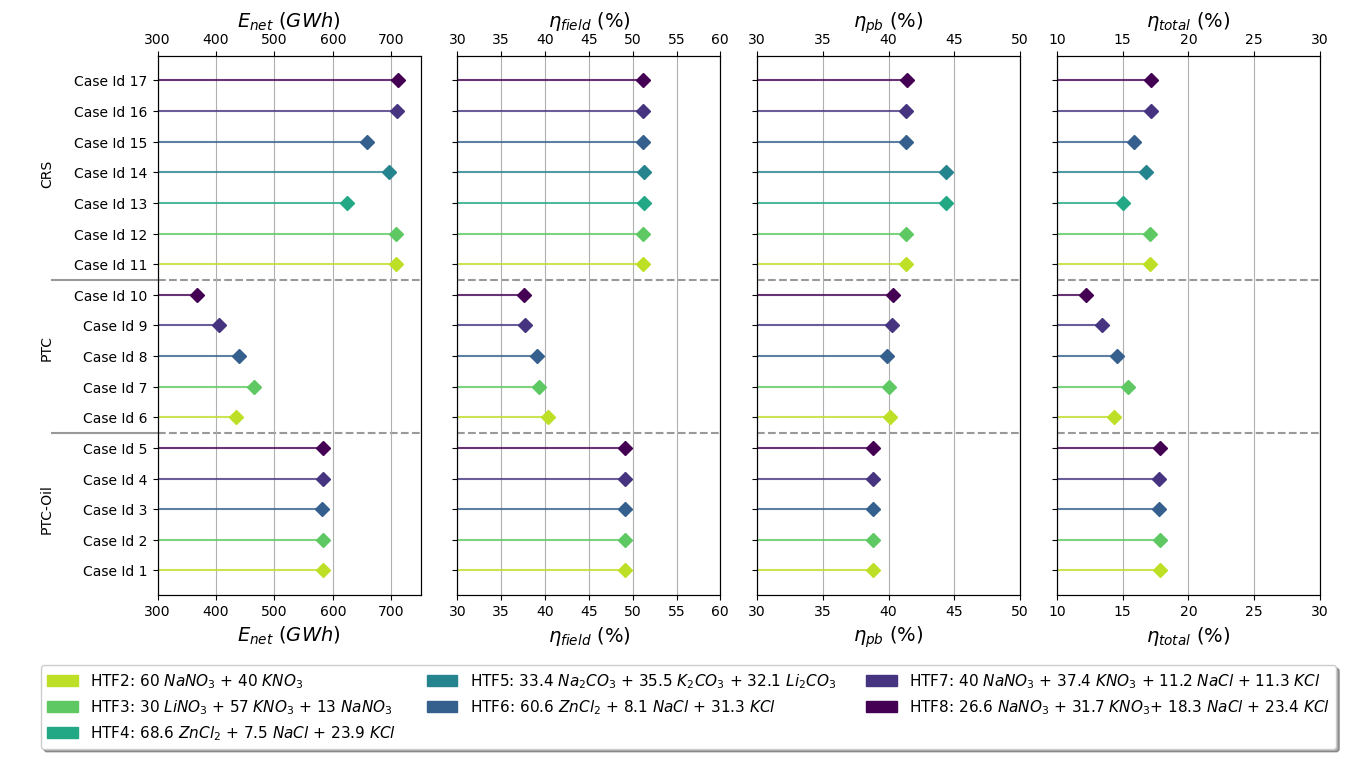

In [10]:
fig2, ax2 = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15,7))
plt.subplots_adjust(wspace=0.14)

for i in axes_2:
    plt.axes(ax2[i])
    ax2[i].set_xlim(xlim1_2[i],xlim2_2[i])
    
    for j in my_range: 
        # These two lines are for lollipop
        plt.hlines(y=my_range[j], xmin=0, xmax=df[var1_2[i]][j], color=c[j], alpha=0.8)
        plt.plot(df[var1_2[i]][j], my_range[j], "D", ms=N_salts ,color=c[j])
                    
    plt.xlabel(var2_2[i], fontsize=fs_x)
    plt.grid(axis='x')
    plt.xticks(fontsize=fs_t)
    ax0 = ax2[i].twiny()
    ax0.set_xlim(ax2[i].get_xlim())
    plt.xlabel(var2_2[i], fontsize=fs_x)
    plt.xticks(fontsize=fs_t)

h = 4.5
delta = 5
ax2[0].axhline(xmin=-0.4,xmax=0,y=h,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
ax2[0].axhline(xmin=-0.4,xmax=0,y=h+delta,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
for i in axes_2:
    ax2[i].axhline(xmin=0,xmax=1,y=h,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)
    ax2[i].axhline(xmin=0,xmax=1,y=h+delta,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)

ax2[0].annotate('CRS',
            xy=(40, 600),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax2[0].annotate('PTC',
            xy=(40, 425),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax2[0].annotate('PTC-Oil',
            xy=(40, 275),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)

plt.yticks(my_range, df['Case'])

# Molten salt legends
plt.legend(handles=[S1_p,S2_p,S3_p,S4_p,S5_p,S6_p,S7_p], loc='lower center', 
           bbox_to_anchor=(-1.4, -0.3), fancybox=True, shadow=True, ncol=3, prop={'size': 11})

plt.show()

3rd Plot - Normalized

In [11]:
axes_3, xlim1_3, xlim2_3, var1_bc_3, var1_o1_3, var1_o2_3, var1_o3_3, var2_3 = ([0,1,2,3],
                                   [0.6,0.45,0,0.6],
                                   [1.6,2,5,1.2],
                                   ['LCOE_bc','CF_bc','Par_bc','eta_n'],
                                   ['LCOE_o1','CF_o1','Par_o1','eta_n1'],
                                   ['LCOE_o2','CF_o2','Par_o2','eta_n2'],
                                   ['LCOE_o3','CF_o3','Par_o3','eta_n2'],
                                   [r'$LCOE_{norm}$',r'$Cap. Factor_{norm}$',r'$Par_{total,norm}$',r'$\eta_{total,norm}$'])

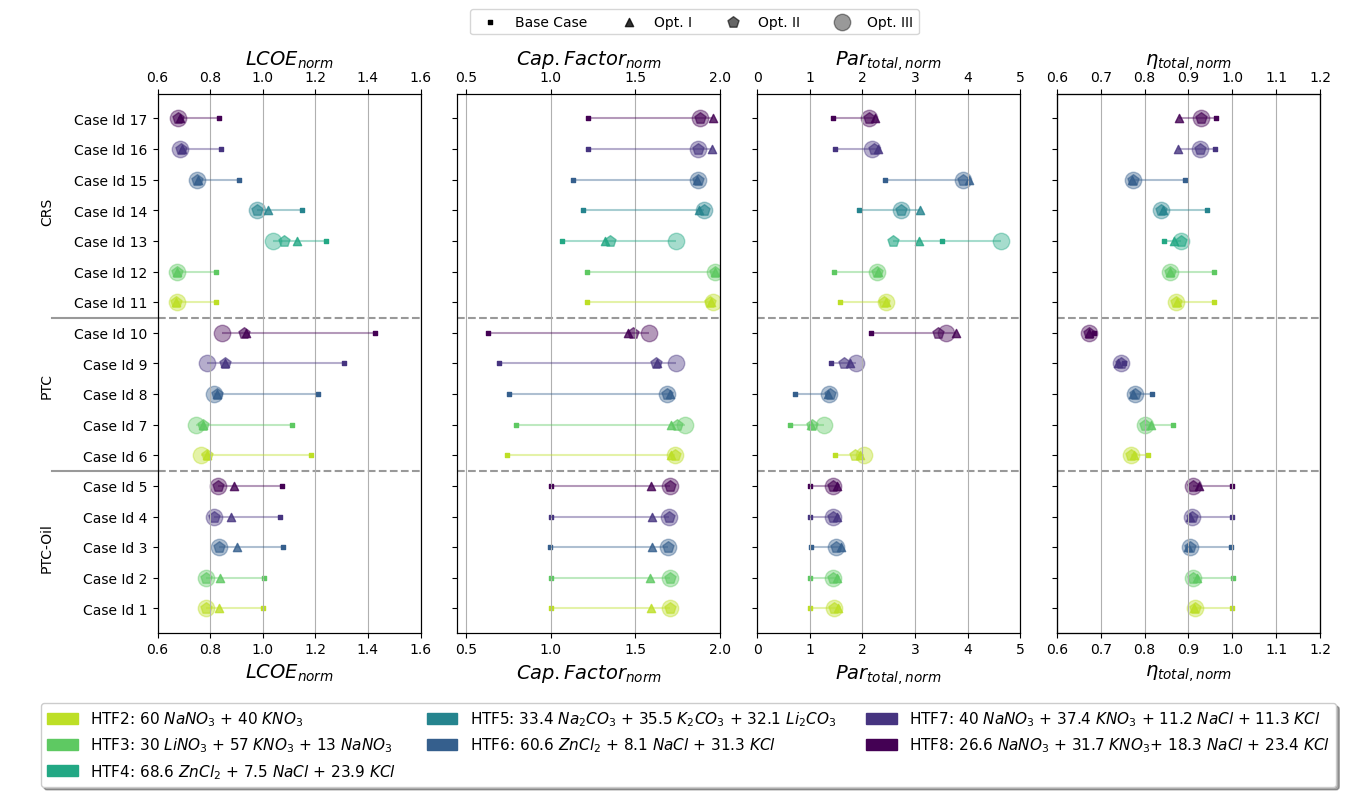

In [23]:
fig3, ax3 = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15,7))
plt.subplots_adjust(wspace=0.14)

for i in axes_3:
    plt.axes(ax3[i])
    ax3[i].set_xlim(xlim1_3[i],xlim2_3[i])
    for j in my_range: 
        # These two lines are for lollipop
        plt.hlines(y=my_range[j], xmin=min(df[var1_bc_3[i]][j], df[var1_o1_3[i]][j], df[var1_o2_3[i]][j], df[var1_o3_3[i]][j]), xmax=max(df[var1_bc_3[i]][j], df[var1_o1_3[i]][j], df[var1_o2_3[i]][j], df[var1_o3_3[i]][j]), alpha=0.4,color=c[j])
        plt.scatter(df[var1_bc_3[i]][j], my_range[j], color=c[j], alpha=1, marker="s", s = 10, label='Base Case')
        plt.scatter(df[var1_o1_3[i]][j], my_range[j], color=c[j], alpha=0.8,marker="^" ,s = 35, label='Optimization I')
        plt.scatter(df[var1_o2_3[i]][j], my_range[j], color=c[j], alpha=0.6,marker="p" ,s = 70, label='Optimization II')
        plt.scatter(df[var1_o3_3[i]][j], my_range[j], color=c[j], alpha=0.4,marker="o" ,s = 140, label='Optimization III')
    plt.xlabel(var2_3[i], fontsize=fs_x)
    plt.grid(axis='x')
    plt.xticks(fontsize=fs_t)
    ax0 = ax3[i].twiny()
    ax0.set_xlim(ax3[i].get_xlim())
    plt.xlabel(var2_3[i], fontsize=fs_x)
    plt.xticks(fontsize=fs_t)
  
h = 4.5
delta = 5
ax3[0].axhline(xmin=-0.4,xmax=0,y=h,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
ax3[0].axhline(xmin=-0.4,xmax=0,y=h+delta,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
for i in axes_2:
    ax3[i].axhline(xmin=0,xmax=1,y=h,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)
    ax3[i].axhline(xmin=0,xmax=1,y=h+delta,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)

ax3[0].annotate('CRS',
            xy=(40, 600),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax3[0].annotate('PTC',
            xy=(40, 425),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax3[0].annotate('PTC-Oil',
            xy=(40, 275),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)

plt.yticks(my_range, df['Case'])

ax_aux = ax3[3].twiny()
legend_salt = ax_aux.legend(handles=[S1_p,S2_p,S3_p,S4_p,S5_p,S6_p,S7_p], loc='lower center', 
           bbox_to_anchor=(-1.4, -0.3), fancybox=True, shadow=True, ncol=3, prop={'size': 11})

markers = ['s','^','p','o']
markers_size =[10, 35, 70, 140]
markers_alpha = [1, 0.8, 0.6,0.4]
labels = ['Base Case', 'Opt. I','Opt. II','Opt. III' ]
for s in range(4):
    ax_aux.scatter([], [], marker = markers[s] ,color='k', label=labels[s], s = markers_size[s], alpha=markers_alpha[s])
    plt.xticks([])
leg_opt = ax_aux.legend(scatterpoints=1, frameon=True, labelspacing=1,bbox_to_anchor=(-0.5, 1.17),ncol =4)

ax_aux.add_artist(legend_salt)
plt.show()

In [190]:
aux=list(range(4))
aux

[0, 1, 2, 3]